<a href="https://colab.research.google.com/github/handetushar/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Passenger Referral Prediction**

## **Problem Statement**
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. 
The main objective is to predict whether passengers will refer the airline to their friends.

## **Data Description**
Feature descriptions briefly as follows:<br>
airline: Name of the airline.<br>
overall: Overall point is given to the trip between 1 to 10.<br>
author: Author of the trip<br>
reviewdate: Date of the Review customer review: Review of the customers in free text format<br>
aircraft: Type of the aircraft<br>
travellertype: Type of traveler (e.g. business, leisure)<br>
cabin: Cabin at the flight date flown: Flight date<br>
seatcomfort: Rated between 1-5<br>
cabin service: Rated between 1-5<br>
foodbev: Rated between 1-5 entertainment: Rated between 1-5<br>
groundservice: Rated between 1-5<br>
valueformoney: Rated between 1-5<br>
recommended: Binary, target variable.

## Importing dependencies

In [1]:
# Importing liabraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer

In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stop_words=stopwords.words('english')

In [5]:
from sklearn.model_selection import train_test_split

## Importing the dataframe.

In [6]:
df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML Classification/data_airline_reviews.xlsx')

In [7]:
#Make a copy of our original dataset to protect it from any permanent changes.
airlines_df = df.copy()

In [8]:
# display first five rows
airlines_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Check the shape of the dataset
airlines_df.shape

(131895, 17)

As we can see our data have **131895 instances** and **17 features**.

In [10]:
#Column names of the dataset
airlines_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [11]:
#Check info of dataset
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

*  By examining the info() method, we can see that there are **131895** rows in total and that the maximum number of non-NaN values is only 65947, indicating that every odd row is a NaN.

*   We next considered removing all odd rows from the dataset, however we realized later that the dataset's end still contained NaN rows.

In [12]:
#Check the null value count for each column
airlines_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [13]:
#Define a function for Null-Values in percentage form.
def missing_values_per_check(df):
    percent_missing = airlines_df.isnull().sum() * 100 / len(airlines_df)
    missing_values_df = pd.DataFrame({'column_name': airlines_df.columns,
                                     'percent_missing': percent_missing})
    missing_values = missing_values_df.sort_values('percent_missing',ascending=False)
    idx = missing_values.reset_index(drop = 'index',inplace = True)
    return missing_values

In [14]:
#Null-values in percentage before removal.
missing_values_per_check(airlines_df)

,column_name,percent_missing
0,aircraft,85.050229
1,ground_service,70.159597
2,date_flown,69.951097
3,route,69.880587
4,traveller_type,69.858600
5,entertainment,66.493802
6,food_bev,60.113727
7,seat_comfort,53.992949
8,cabin_service,53.967171
9,cabin,52.005004


In [15]:
# Drooping Null values if the complete row is empty
airlines_df.dropna(axis=0, how='all', inplace=True)
#Reset index of Dataframe.
airlines_df.reset_index(drop= 'index', inplace = True)

In [16]:
# size of the dataset after dropping the null rows
airlines_df.shape

(65947, 17)

In [17]:
airlines_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [18]:
#Check duplicates
value=len(airlines_df[airlines_df.duplicated()])
print("\033[1mThe number of duplicate values in the data set is\033[0m : ",value)

The number of duplicate values in the data set is :  4764


In [19]:
airlines_df.drop_duplicates(inplace= True)

In [20]:
airlines_df.duplicated().sum()

0

In [21]:
#Modify the date flown column
airlines_df['date_flown']= pd.to_datetime(airlines_df.date_flown)

In [22]:
#New columns month , day and  year added to dataset
for df in [airlines_df]:
    airlines_df['month'] = airlines_df['date_flown'].dt.month
    airlines_df['year'] = airlines_df['date_flown'].dt.year
    airlines_df['day'] = airlines_df['date_flown'].dt.day

In [23]:
#Drop original date flown column
airlines_df.drop('date_flown', axis=1 , inplace= True)

In [24]:
#Check info after cleaning the dataset
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 0 to 65946
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   seat_comfort     56211 non-null  float64
 10  cabin_service    56240 non-null  float64
 11  food_bev         48341 non-null  float64
 12  entertainment    40230 non-null  float64
 13  ground_service   37169 non-null  float64
 14  value_for_money  59327 non-null  float64
 15  recommended      59761 non-null  object 
 16  month            37434 non-null  float64
 17  year        

In [25]:
#Checking the number of unique values in each columns.
uniq = dict(airlines_df.nunique())
uniq

{'airline': 81,
 'overall': 10,
 'author': 44069,
 'review_date': 3015,
 'customer_review': 61172,
 'aircraft': 2088,
 'traveller_type': 4,
 'cabin': 4,
 'route': 24549,
 'seat_comfort': 5,
 'cabin_service': 5,
 'food_bev': 5,
 'entertainment': 5,
 'ground_service': 5,
 'value_for_money': 5,
 'recommended': 2,
 'month': 12,
 'year': 7,
 'day': 1}

In [26]:
#Getting the number of unique values of some categorical variables with their counts.
for var in uniq :
  if (uniq[var]) <= 10:
    print(f'The column \033[1m\033[4m{var}\033[0m has unique values :\n{airlines_df[var].value_counts()}\n', '-'*50)

The column overall has unique values :
1.0     16103
10.0     8025
9.0      7363
8.0      6705
2.0      5491
7.0      4215
3.0      3741
5.0      2924
6.0      2436
4.0      2398
Name: overall, dtype: int64
 --------------------------------------------------
The column traveller_type has unique values :
Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64
 --------------------------------------------------
The column cabin has unique values :
Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64
 --------------------------------------------------
The column seat_comfort has unique values :
1.0    13908
4.0    13485
3.0    11358
5.0     9834
2.0     7626
Name: seat_comfort, dtype: int64
 --------------------------------------------------
The column cabin_service has unique values :
5.0    17267
1.0    13577
4.0    10553
3.0     8171
2.0   

As per above results we can observe:
* The number of unique values present in dataset and the target variable has balanced data.
* The day variable has only single value in it, therefore this column may be dropped.


In [27]:
#Get some statical information of numerical as well as categorical columns
airlines_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seat_comfort,56211.0,NaN,NaN,NaN,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0


# **EDA(Exploratory Data Analysis)**:

In [28]:
#Assign numerical features.
numerical_features = airlines_df.select_dtypes(include=['int64','float64'])
numerical_features.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'month', 'year', 'day'],
      dtype='object')

In [29]:
#Assign categorical features.
categorical_features = airlines_df.select_dtypes(include=['object'])
categorical_features.columns

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended'],
      dtype='object')

## **Univariate Analysis**

In [30]:
#We define a function to implement Univariate Analysis.
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

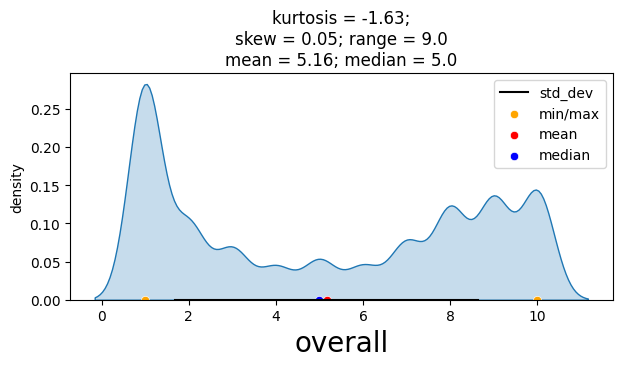

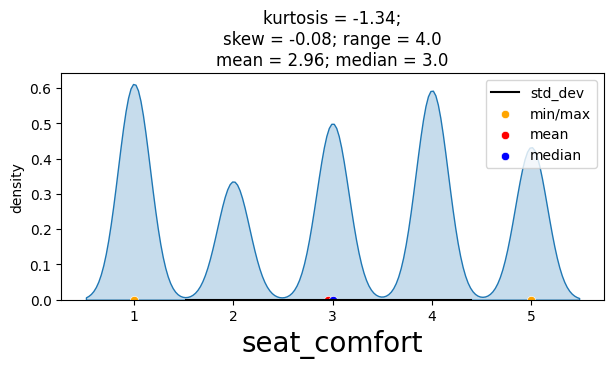

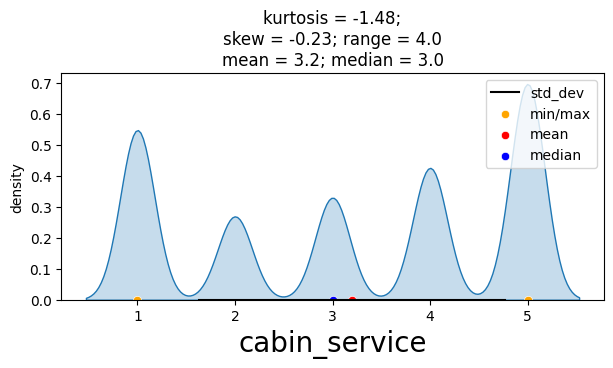

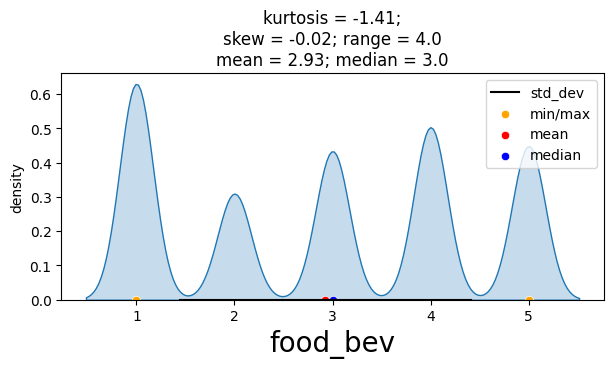

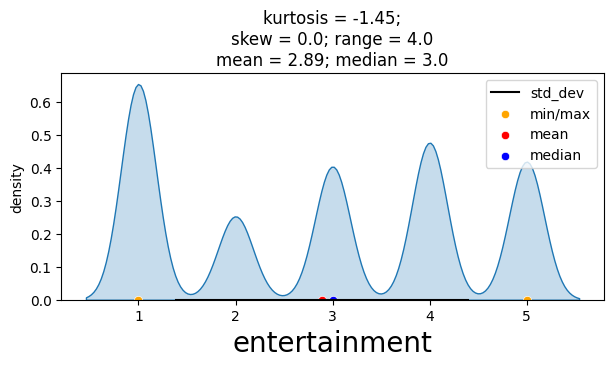

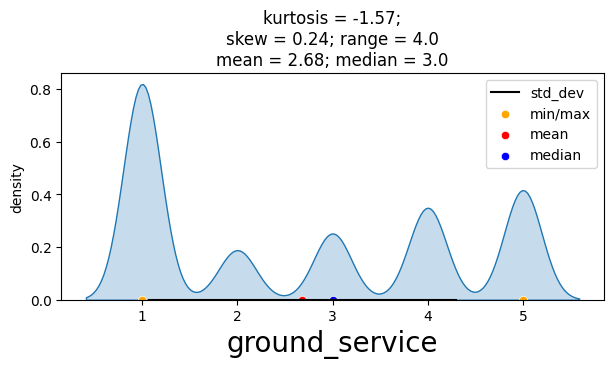

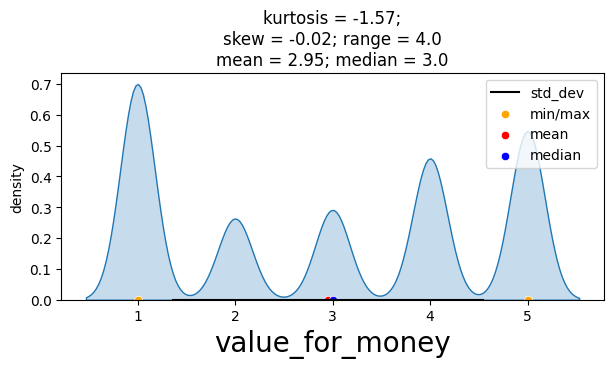

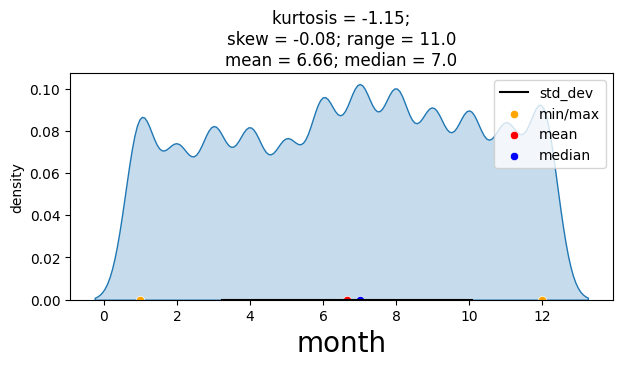

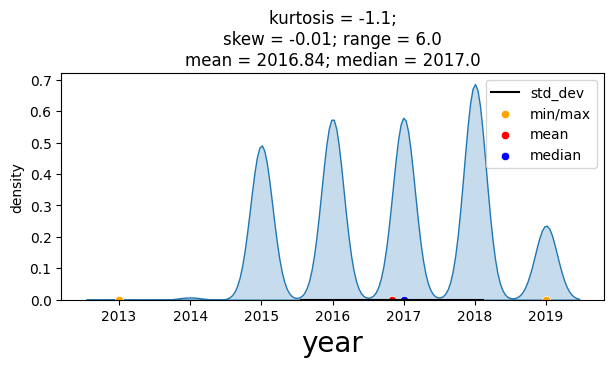

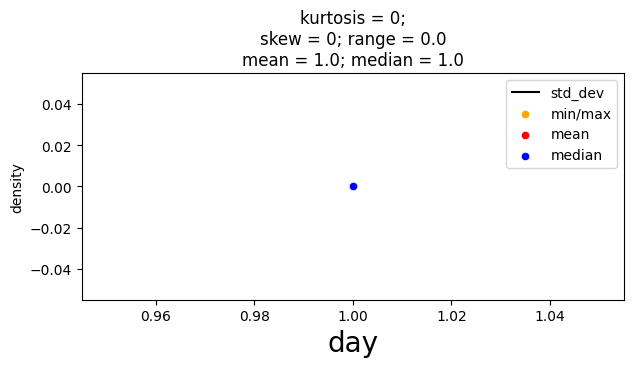

In [33]:
#Check distribution of all numerical features individually
for num in numerical_features:
  UVA_KDE(airlines_df,[num])

By using univariate analysis, we found:
* The range for the overall rating is from 1 to 10. It has mean value 5.15 and the median is 5.
* The distributions of the columns for seat comfort, cabin service, food beverages, entertainment, ground service, and value for money all contain multiple peaks, making them all multimodal variables. These features have a median of 3.
* The month feature's highest peak is 7. Later in our evaluation, we will analyse this feature again.
* With a mean year of 2016 and a median year of 2017, the year column spans from 2013 to 2019.

In [31]:
#We define a function to check the outliers in the dataset.
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

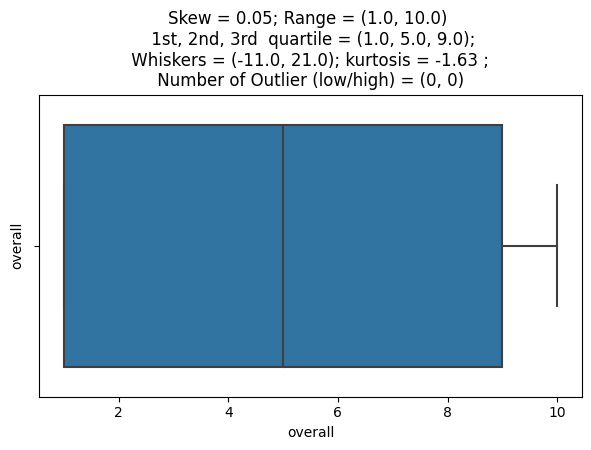

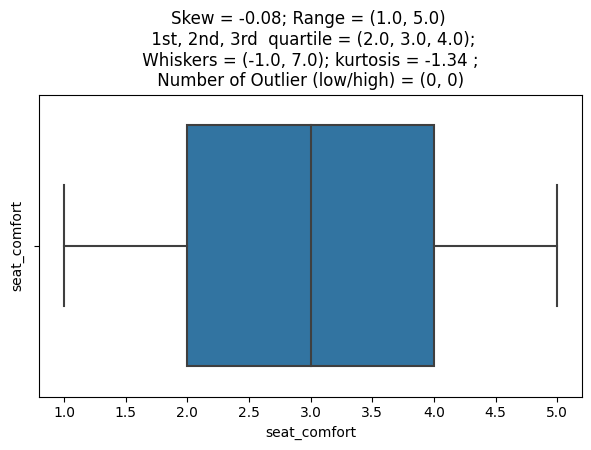

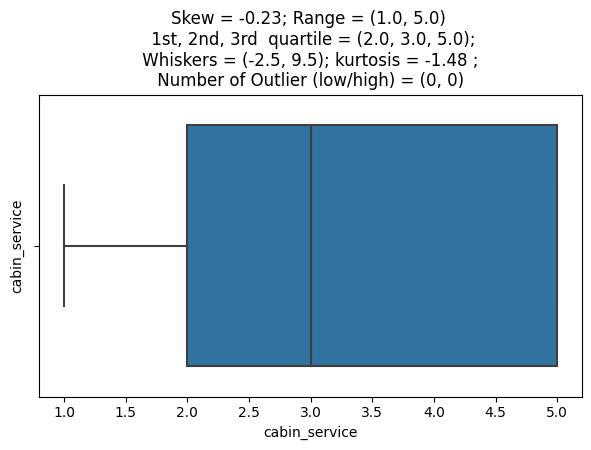

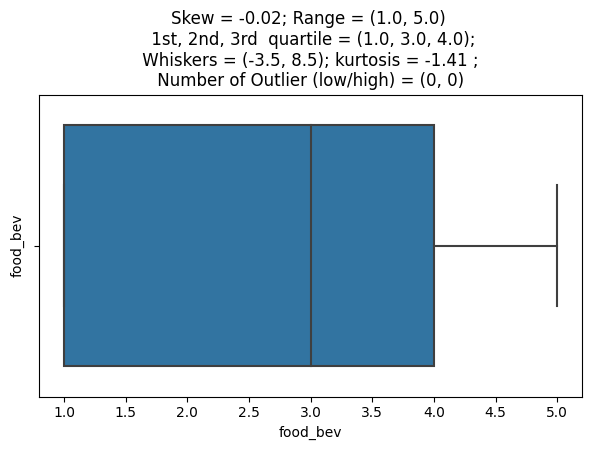

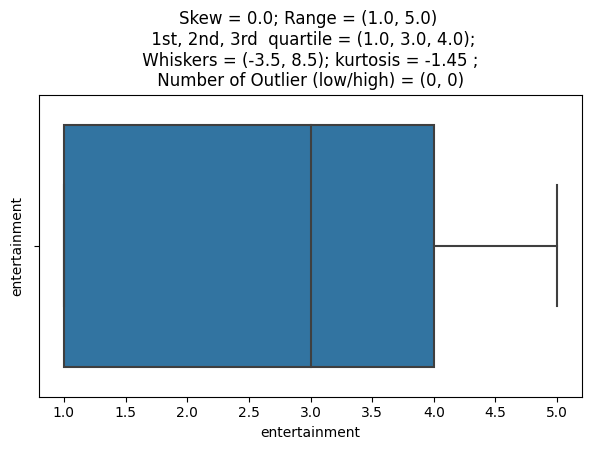

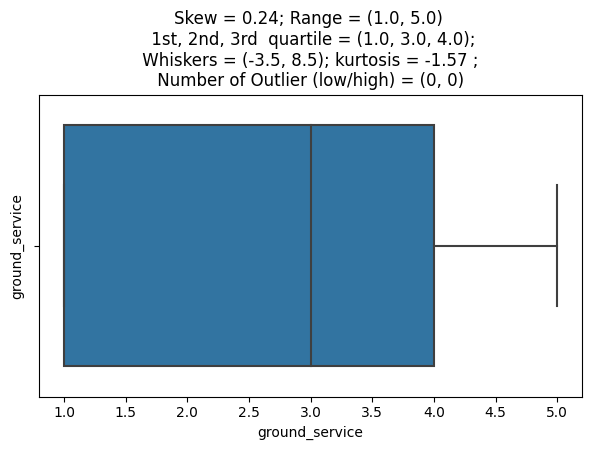

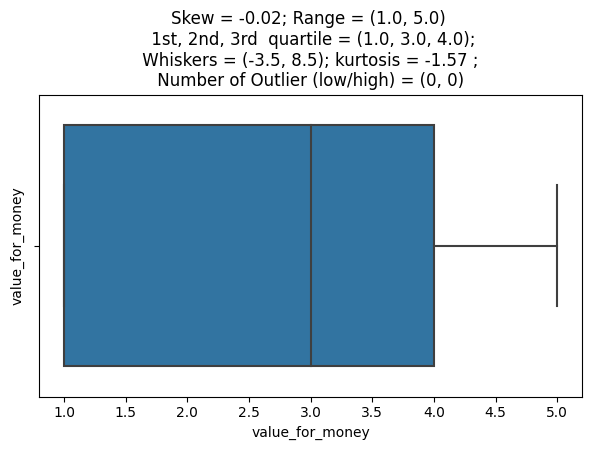

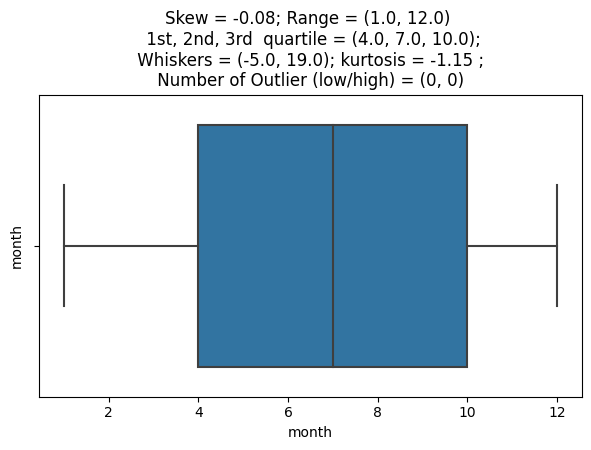

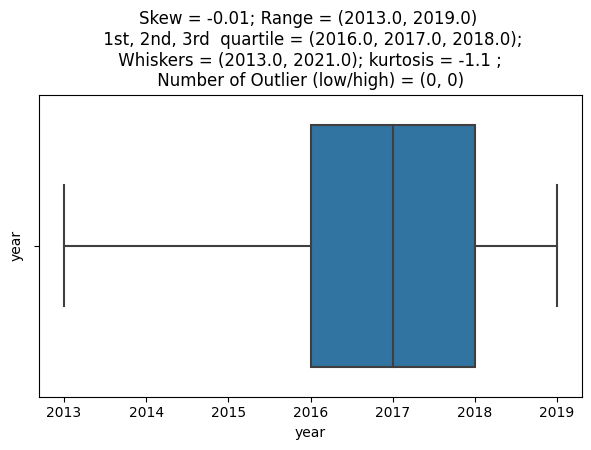

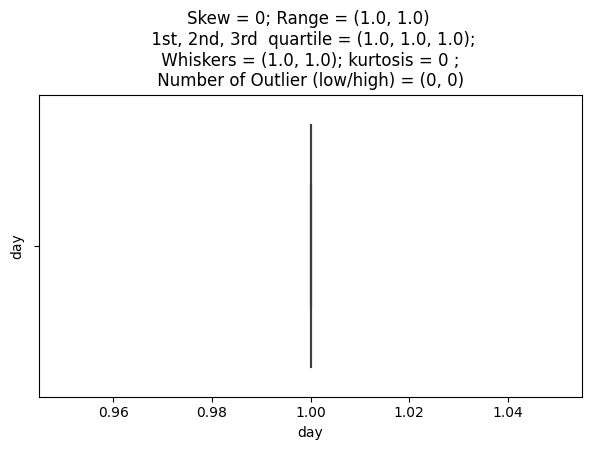

In [32]:
#Check the outliers with all numerical features individually.
for numb in numerical_features:
  UVA_boxplot(airlines_df,[numb])

In [ ]:
stop_word=stopwords.words('english')

In [ ]:
airlines_df[['customer_review', 'recommended']]

,customer_review,recommended
1,âœ… Trip Verified | London to Izmir via Istanb...,yes
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no
...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no
131888,I had a good flight from London to Kiev with U...,no
131890,Kiev - London (Gatwick) in business class (in ...,no
131892,Several flights - KBP to AMS (3 times one way)...,no


In [ ]:
# import re for regularExpression
# importing natural language toolkit
import re
import nltk
import string
from nltk import pos_tag
# importing stopwords from nitk corpus
from nltk.corpus import stopwords
from nltk.corpus import wordnet
# downloading all stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Returning the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def text_cleaning(data):

  # Remove single characters from the start
  processed_feature = re.sub('[^a-zA-Z]', ' ', data) 

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()

  processed_feature = processed_feature.split(' ')
  
   # removing stopword
  stop_words=set(stopwords.words('english'))
  stop_words.remove('not')
  processed_feature = [i for i in processed_feature if i not in stop_words]

  # pos tag text
  pos_tags = pos_tag(processed_feature)

  # using lemmatization on words
  processed_feature = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
  # remove words with only two letter
  processed_feature = [t for t in processed_feature if len(t) > 2]

   # join all
  processed_feature = ' '.join(processed_feature)
  return processed_feature

In [ ]:
# creating token of words with the help of text cleaning function
df['tokenized_review'] = df['customer_review'].apply(text_cleaning)

In [ ]:
len(df['customer_review'][1])

1143

In [ ]:
len(df['tokenized_review'][1])

740

In [ ]:
df =df.reset_index(drop= ['index'])
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,tokenized_review
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes,trip verify london izmir via istanbul first ti...
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no,trip verify istanbul bucharest make check airp...
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no,trip verify rome prishtina via istanbul fly co...
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,trip verify flew turkish airline iad ist khi r...
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no,trip verify mumbai dublin via istanbul never b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59756,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,two domestic flight kiev lviv last week troubl...
59757,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,good flight london kiev ukraine international ...
59758,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,kiev london gatwick business class april flown...
59759,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,several flight kbp ams time one way lgw zrh tw...


In [ ]:
#Text Vecorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=6000)

In [ ]:
df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})

In [ ]:
#Input and Output Features
X = tfidf.fit_transform(df['tokenized_review']).toarray()
y = df['recommended'].values

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
#Imports Lib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
import time
# Importing  metrics for evaluation for our models
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
#Declare the models
lr_model=LogisticRegression()
pac_model=PassiveAggressiveClassifier()
gb_model = GradientBoostingClassifier(n_estimators = 50,max_depth = 6,min_samples_split = 10,min_samples_leaf = 30)
rf_model=RandomForestClassifier()
gnb_model = GaussianNB()
Mnb_model=MultinomialNB()


#Create a list of models
models=[lr_model,pac_model,gb_model,gnb_model,Mnb_model,rf_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #Compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'MOdel_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [ ]:
# Get performance matrix dataframe for different classifiers.
final_result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

In [ ]:
#  Get performance on different models
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,MOdel_training_time
0,LogisticRegression,92.50,91.38,92.72,91.42,91.47,90.32,92.45,91.33,0.913312,44.658776
1,PassiveAggressiveClassifier,94.05,88.77,91.46,85.94,96.54,91.27,94.15,88.89,0.888942,23.619645
2,GradientBoostingClassifier,88.76,87.24,89.07,87.27,87.14,85.59,88.69,87.16,0.871615,1167.215859
3,GaussianNB,82.68,79.90,78.63,76.11,87.49,84.02,82.89,80.10,0.801050,4.016248
4,MultinomialNB,86.01,85.55,83.85,83.38,87.56,86.86,86.08,85.62,0.856155,1.097825
5,RandomForestClassifier,99.99,88.54,99.98,87.84,100.00,88.03,99.99,88.51,0.885136,187.706834
